In [1]:
#pingouin cannot be imported while using a grabnode
from pingouin import ancova
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
feature_type = 'ATAC'
data = pd.read_csv(feature_type+'_results/first_sample_means.txt', sep='\t')
data=data[data['tumor_fraction']>=0.1]

current = data[(data['merged_ER_switch'].isin(['same','loss'])) & (data['merged_updated_ER_status_binary']=='-')]
current = current.sort_values(by='merged_ER_switch', ascending = False)

In [3]:
print(len(data))
print(len(current))

101
48


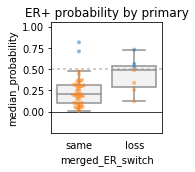

In [4]:
fig,ax = plt.subplots(figsize=(4,2.5))
sns.boxplot(x="merged_ER_switch", y="median_probability", data=current, showfliers = False, ax=ax, color = '.95')
sns.swarmplot(x="merged_ER_switch", y="median_probability", data=current[current['median_probability']>=0.5], color="tab:blue", s = 4, alpha = 0.5, ax=ax)
sns.swarmplot(x="merged_ER_switch", y="median_probability", data=current[current['median_probability']<0.5], color="tab:orange", s = 4, alpha = 0.5, ax=ax)
ax.axhline(.5,color='.75', dashes = [2,2])


ax.set_title('ER+ probability by primary')
ax.set_ylim(-.25,1.05)
ax.axhline(0,color='black', linewidth = 0.75)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
ax.tick_params(bottom = False)
ax.set_yticks(np.arange(0,1.1,.25))

fig.tight_layout()
fig.savefig(feature_type+'_results/ER_prob_boxplot.pdf')

In [5]:
current['merged_ER_switch'].value_counts()

same    41
loss     7
Name: merged_ER_switch, dtype: int64

In [6]:
ancova_results = ancova(data=current, dv='median_probability', covar='tumor_fraction', between='merged_ER_switch')
ancova_results.to_csv(feature_type+'_results/ancova_results.txt', sep='\t')
ancova_results

,Source,SS,DF,F,p-unc,np2
0,merged_ER_switch,0.182727,1,6.475675,0.014436,0.125801
1,tumor_fraction,0.141703,1,5.021802,0.030010,0.100392
2,Residual,1.269788,45,NaN,NaN,NaN


In [7]:
len(current)

48